# Libraries

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [25]:
print(iris.data.shape)
print(iris.feature_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Processing Data

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_features = sc.fit_transform(iris.data)

# Modeling

### Calculate The Cluster

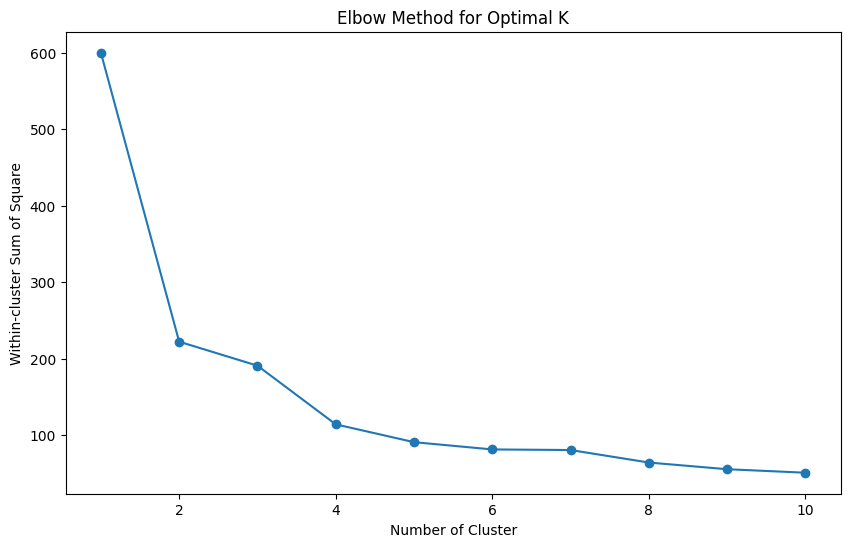

In [27]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Cluster')
plt.ylabel('Within-cluster Sum of Square')
plt.show()

## KMeans

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(scaled_features)

## Evaluation

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print(classification_report(iris.target, cluster))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      50.0
           1       0.00      0.00      0.00      50.0
           2       0.00      0.00      0.00      50.0

    accuracy                           0.00     150.0
   macro avg       0.00      0.00      0.00     150.0
weighted avg       0.00      0.00      0.00     150.0



## Visualization

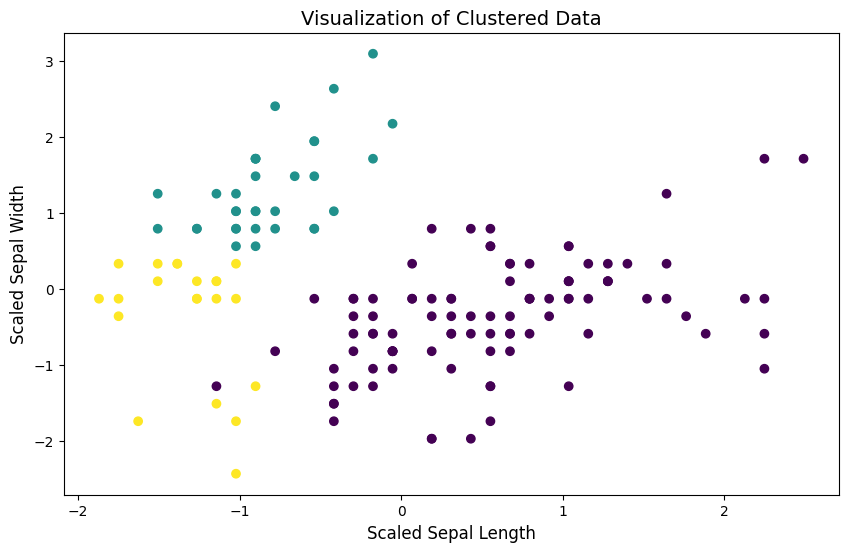

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c = cluster, cmap='viridis', marker='o')
plt.title('Visualization of Clustered Data', fontsize = 14)
plt.xlabel('Scaled Sepal Length', fontsize = 12)
plt.ylabel('Scaled Sepal Width', fontsize = 12)
plt.show()